In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#### Data cleaning

In [9]:
# check the duplicates 
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [10]:
dataset.duplicated().sum()

13

In [11]:
dataset = dataset.drop_duplicates()

In [12]:
dataset.shape

(570, 11)

#### check the misssing values

In [14]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

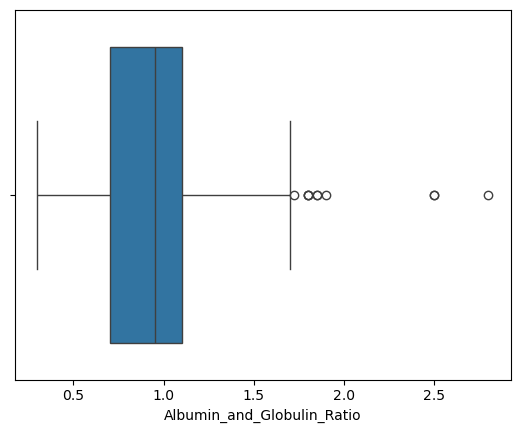

In [15]:
sns.boxplot(data=dataset, x='Albumin_and_Globulin_Ratio')

In [16]:
# find the mean ,mode, median
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [17]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [18]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [19]:
# fill the values, median()
dataset['Albumin_and_Globulin_Ratio'] =dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [20]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [21]:
# male vs female

<Axes: xlabel='Gender', ylabel='count'>

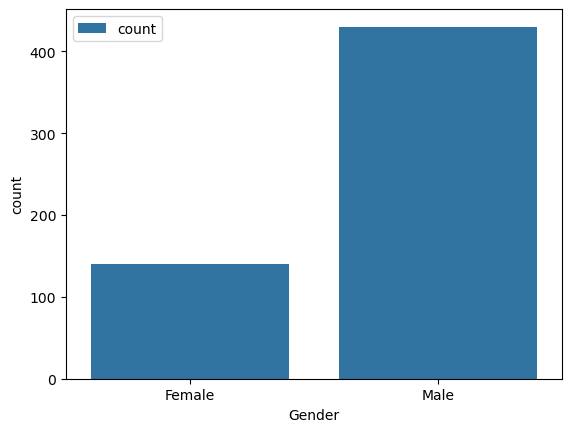

In [22]:
sns.countplot(data= dataset, x= 'Gender', label='count' )

In [23]:
Male,Female = dataset['Gender'].value_counts()

In [24]:
print('how many patient : ',Male)
print('how many patient : ',Female)

how many patient :  430
how many patient :  140


### Encoding for Gender

In [26]:
def  partion(x):
    if x=='Male':
        return 1
    return 0
dataset['Gender']=dataset['Gender'].map(partion)

In [27]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [28]:
## covert to output  data column 
def new(y):
    if y==2:
        return 0
    return 1
dataset['Dataset']= dataset['Dataset'].map(new)

In [29]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [30]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

### correlation matrix

<Axes: >

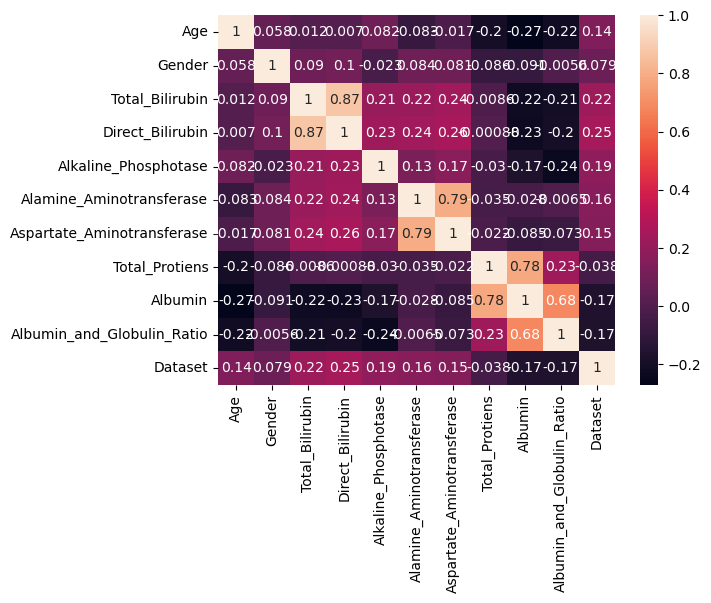

In [32]:
corr_max=dataset.corr()
# create a heatmap
sns.heatmap(corr_max,annot=True)

### Data preparation

In [34]:
# creat featrue matrix / arrays
x = dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [35]:
# split dataset training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=42)

In [36]:
# feature  scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Machine learning modle
## LogisticRegression Alogorithm

In [38]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [39]:
lr_y_pred = log_classifier.predict(x_test)

In [40]:
# check to errors
error = (lr_y_pred!=y_test).sum()

In [41]:
error

39

confusion_matrix : [[ 9  8]
 [31 95]]


<Axes: >

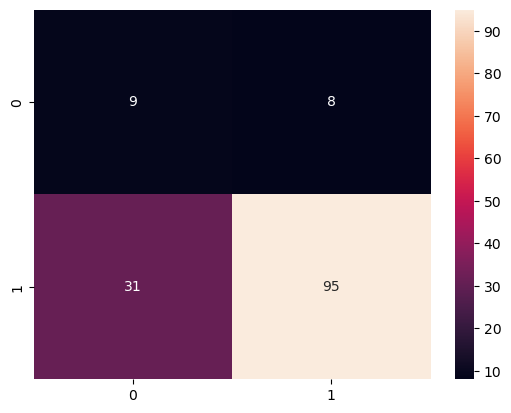

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lr_y_pred,y_test)
print('confusion_matrix :',cm)
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [44]:
print("Acuuracy score is : ", accuracy_score(lr_y_pred,y_test))
print("Precision_score is : ", precision_score(y_test,lr_y_pred))

Acuuracy score is :  0.7272727272727273
Precision_score is :  0.753968253968254


## K- Nearest Neighbors [KNN] Alogorithm

In [46]:
x_train.shape

(427, 10)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_clr = KNeighborsClassifier(n_neighbors=21, metric='minkowski')
knn_clr.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [48]:
knn_y_pred = knn_clr.predict(x_test)

Confusion_matrix is :  [[ 8 13]
 [32 90]]


<Axes: >

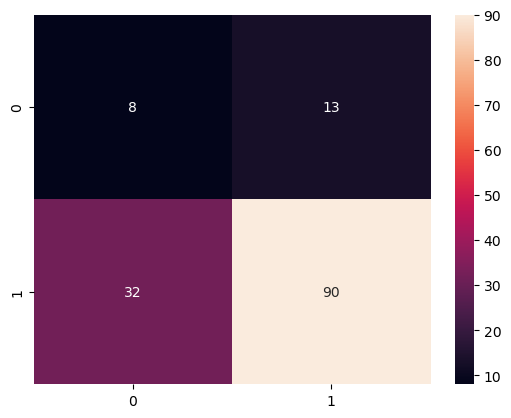

In [49]:
# accuracy and confusion matrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm = confusion_matrix(knn_y_pred,y_test)
print("Confusion_matrix is : ", confusion_matrix(knn_y_pred,y_test))
sns.heatmap(cm,annot=True)

In [50]:
print("Accuracy_score is :",accuracy_score(knn_y_pred,y_test))
print("Precision_score is : ",precision_score(y_test,knn_y_pred))

Accuracy_score is : 0.6853146853146853
Precision_score is :  0.7377049180327869


## Suport Vecor Mechine[SVM] Algorithm

In [52]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state=0 )
svm_classifier.fit(x_train,y_train)

SVC(random_state=0)

In [53]:
sv_y_pred = svm_classifier.predict(x_test)

Confusion_matrix : [[  1   1]
 [ 39 102]]


<Axes: >

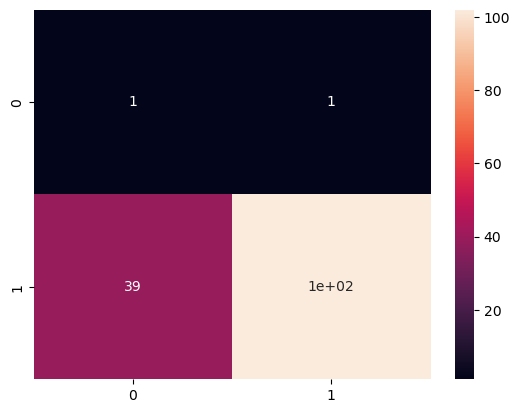

In [54]:
from sklearn.metrics  import accuracy_score,confusion_matrix,precision_score
cm = confusion_matrix(sv_y_pred,y_test)
print("Confusion_matrix :",confusion_matrix(sv_y_pred,y_test))
sns.heatmap(cm, annot=True)

In [55]:
print("accuracy is :",accuracy_score(y_test,sv_y_pred))
print("Precision_score : ", precision_score(y_test,sv_y_pred))

accuracy is : 0.7202797202797203
Precision_score :  0.723404255319149


### Artifical Netrual Networks [ANN]

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [58]:
classifier = Sequential()

In [59]:
# create a input layer and first hidden layer
classifier.add(Dense(units=400, activation='relu', input_dim=10))
classifier.add(Dropout(rate=0.1))
# create a second hidden layer
classifier.add(Dense(units=400, activation='relu'))
classifier.add(Dropout(rate=0.1))
# output layer
classifier.add(Dense(units=1, activation='sigmoid'))

C:\Users\jagadeesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# compiler neural networks
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# train and fit the networks
classifier.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6221 - loss: 0.6238
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7220 - loss: 0.5141
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7322 - loss: 0.4899
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7547 - loss: 0.4822
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7177 - loss: 0.4983
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7318 - loss: 0.4833
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7400 - loss: 0.4958
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7544 - loss: 0.4797
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7789 - loss: 0.4662 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7543 - loss: 0.4608 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7655 - loss: 0.4502 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

In [61]:
ann_y_pred = classifier.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [62]:
ann_y_pred[0]

array([0.9930371], dtype=float32)

In [63]:
ann_y_pred = ann_y_pred>=0.5

[[14 16]
 [26 87]]


<Axes: >

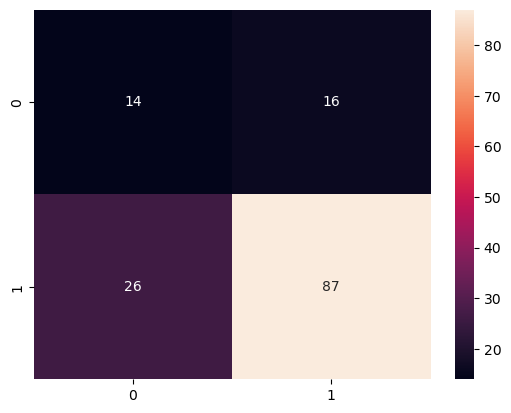

In [64]:
# check the confusion_matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ann_y_pred,y_test)
print(cm)
sns.heatmap(cm, annot=True)

In [65]:
# check the accuracy_score, precision_score
from sklearn.metrics import accuracy_score, precision_score
print("Accuracy score is : ",accuracy_score(y_test,ann_y_pred))
print("Precision_score is : ", precision_score(y_test,ann_y_pred))

Accuracy score is :  0.7062937062937062
Precision_score is :  0.7699115044247787


### saving the model

In [67]:
import pickle
pickle.dump(knn_clr, open('model.pkl','wb'))
pickle.dump(sc, open('sc.pkl','wb'))